https://www.tensorflow.org/tutorials/keras/classification
신경망 훈련하기 : 기초적인 분류문제
Tensorflow 2.X 튜토리얼

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.15.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
train_images.shape
test_images.shape

(10000, 28, 28)

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

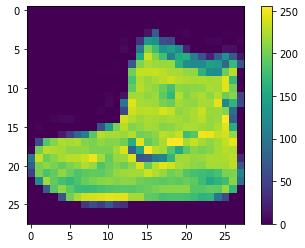

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

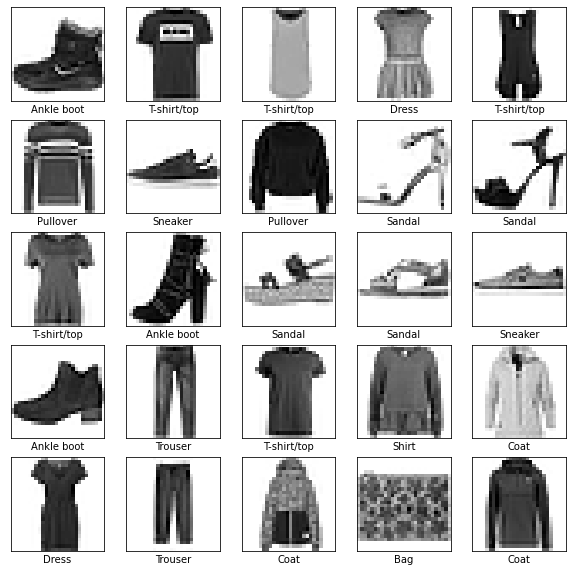

In [25]:
plt.figure(figsize=(10,10))
for i in range(25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                         ])
# Flatten은 2차원 배열의 이미지 포맷을 , 1차원 배열로 변환.
# Dense : 128개 , 10개 의 노드

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [27]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

In [28]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4912 - acc: 0.8270
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3729 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3372 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3126 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2940 - acc: 0.8910


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.3672 - acc: 0.8669

테스트 정확도: 0.8669


In [30]:
predictions = model.predict(test_images)

In [32]:
np.argmax(predictions[0])

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

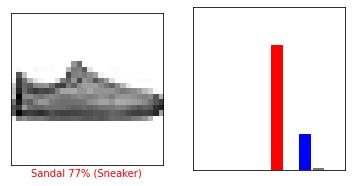

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

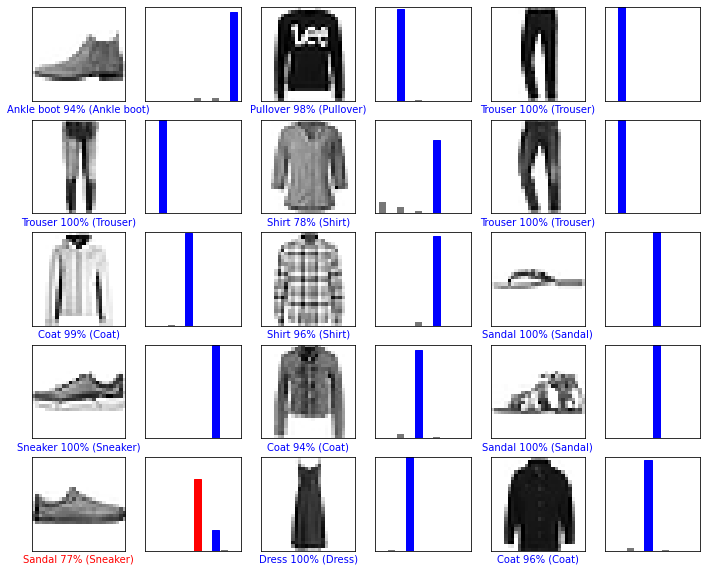

In [38]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()